Before starting analysing the data, please consider this general sequence of steps that was introduced to you during a class.

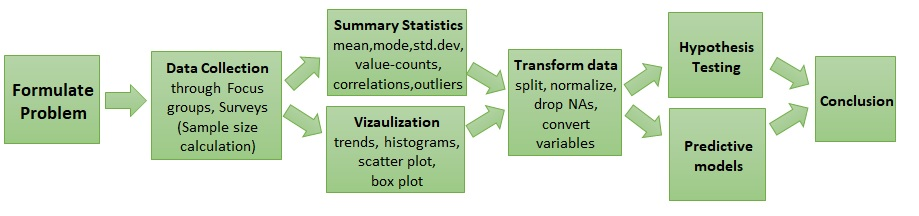

# Descriptive Statistics; Hypothesis Testing (T-test);                                                    Customer segmentation by K-Means clustering; Conjoint analysis
Excel and Python were used

<p>This notebook provides an example code for describing the data, doing hypyhesis testing (T-test),segmenting customers using the k-means clustering algorithm, and doing conjoint analysis by using linear regression.</p>
<p>The data (for different models) was prepared using MS Excel (privot tables, vlookup(), if()) and the results were also saved for further analysis in MS Excel.</p>

In [159]:
# import pandas library for working with dataframes
import pandas as pd

In [160]:
# We are interested in the 3rd Excel sheet in our file
#Instead of sheet name, you can put the number of sheet, however note that 
#In Python, 2nd sheet has index 1, as enumeration starts from 0
Data=pd.read_excel("segment.xlsx",sheetname="Data") 
Gender_data=pd.read_excel("segment.xlsx",sheetname="Disc_Gender") #the gender was randomly generated for customers to be able to run T-test

C:\Users\HP\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


# Descriptive statistics

Before starting analyzing any data, consider about summary statistics and manipulation of the data as described in the graph at the beginning.

In [161]:
#First, lets see how the data looks 
Data.head()

,Names,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [162]:
Gender_data.head()

,Customer Last Name,Gender,Discount
0,Smith,Male,17
1,Johnson,Male,47
2,Williams,Male,50
3,Brown,Male,40
4,Jones,Male,45


In [163]:
#let's see types of our variables, for example further we may need to transform some variables (NOT in this example)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
Names    100 non-null object
1        100 non-null int64
2        100 non-null int64
3        100 non-null int64
4        100 non-null int64
5        100 non-null int64
6        100 non-null int64
7        100 non-null int64
8        100 non-null int64
9        100 non-null int64
10       100 non-null int64
11       100 non-null int64
12       100 non-null int64
13       100 non-null int64
14       100 non-null int64
15       100 non-null int64
16       100 non-null int64
17       100 non-null int64
18       100 non-null int64
19       100 non-null int64
20       100 non-null int64
21       100 non-null int64
22       100 non-null int64
23       100 non-null int64
24       100 non-null int64
25       100 non-null int64
26       100 non-null int64
27       100 non-null int64
28       100 non-null int64
29       100 non-null int64
30       100 non-null int64
31       100 non-null int64

In [164]:
#Checking for NAs
Data.isnull().values.any()
#if there is NAs, you should drop them using: Data.dropna()

False

In [165]:
#this gives summary statistics(count,mean,std.dev,max,min) of continous variables but not applicable for our variables as the values are only (1 and 0)
Data.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.100000,0.100000,0.060000,0.120000,0.040000,0.120000,0.190000,0.200000,0.100000,0.070000,...,0.050000,0.120000,0.060000,0.15000,0.090000,0.060000,0.170000,0.220000,0.170000,0.040000
std,0.301511,0.301511,0.238683,0.326599,0.196946,0.326599,0.394277,0.402015,0.301511,0.256432,...,0.219043,0.326599,0.238683,0.35887,0.287623,0.238683,0.377525,0.416333,0.377525,0.196946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Independent Two-Sample T test

In [166]:
#first, lets do crosstab of gender and discount
Gender_data["Discount"].groupby(Gender_data["Gender"]).describe() 

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,50.0,51.28,18.978011,17.0,40.0,47.0,56.0,87.0
Male,50.0,52.04,18.005623,17.0,40.0,48.0,57.0,89.0


As output shows there is slight difference of average discount offered to male and female customers. Now, let's see wether this difference is significant or it's by chance.

In [167]:
#T-test should be run only for continous variables, also consider sample size (should not be too small)
from scipy import stats
stats.ttest_ind(Gender_data['Discount'][Gender_data['Gender']=="Female"],
               Gender_data['Discount'][Gender_data['Gender']=="Male"])

Ttest_indResult(statistic=-0.20542531162659905, pvalue=0.8376659515422827)

# K-Means

In [168]:
# sklearn is the most popular machine library in the world
# it is a huge library, so we will only import the function that we will use (KMeans)
from sklearn.cluster import KMeans

In [169]:
# initialize the number of clusters as an argument to KMeans function which is chosen intuitively
cluster = KMeans(4)
cluster #main attributes of KMeans model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [170]:
# prepare dataset for the algorithm (i.e. get rid of the very first column with names)
Train = Data.iloc[:,1:]

In [171]:
Train.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [172]:
# predict clusters and save them in our dataframe as one last additional column
Data["cluster"] = cluster.fit_predict(Train)

In [173]:
Data.head()

,Names,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,Anderson,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,3
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,2


<h3>Elbow Method</h3>

In [174]:
#There is a method to choose optimal value of k (number of clusters). The method is called elbow method. 
import numpy as np

K=range(1,10)

np.random.seed(222)
sse={}
for k in K:
    cluster_wine=KMeans(k)
    Data['cluster_wine']=cluster_wine.fit_predict(Train)
    sse[k] = cluster_wine.inertia_ #Sum of squared distances of samples to their closest cluster center, other measures of distances can also be taken
        
#lets see what sse contains
sse

{1: 281.90000000000003,
 2: 251.46031746031744,
 3: 228.1857142857143,
 4: 213.18392857142857,
 5: 206.20555555555555,
 6: 196.43854062604063,
 7: 187.25212201591512,
 8: 181.1096073517126,
 9: 171.54890501655206}

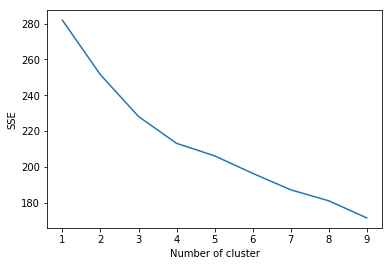

In [175]:
#plotting elbow curve to see the optimal number of clusters that can be chosen
import matplotlib.pyplot as plt

plt.figure()
plt.plot(sse.keys(),sse.values()) #sse is dictionary, plotting 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

<h3>Silhouette score method</h>

Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)

In [176]:
from sklearn.metrics import silhouette_score

np.random.seed(222)

sil_coef={}
for k in range (2,10): #
    cluster_wine=KMeans(k)
    Data['cluster_wine']=cluster_wine.fit_predict(Train)
    sil_coef[k]=silhouette_score(Train,cluster_wine.labels_,metric='euclidean')

#Higher Silhouette Coefficient score relates to a model with better defined clusters
sil_coef

{2: 0.09174871508750351,
 3: 0.1176998005869721,
 4: 0.1290778510407573,
 5: 0.12411580064078519,
 6: 0.12217984285257769,
 7: 0.11933347777532413,
 8: 0.12062079961244511,
 9: 0.11857970340775072}

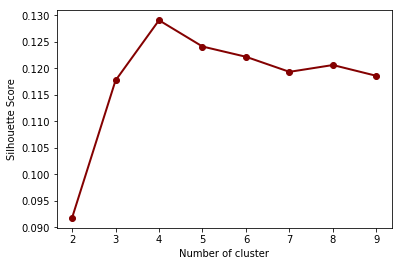

In [177]:
plt.figure()
plt.plot(sil_coef.keys(),sil_coef.values(), color='#840101',linewidth=2,marker='o') #sse is dictionary, plotting 
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [178]:
#Let's use the optimal value of k from silhouette score method as it gave better results
np.random.seed(222)

cluster= KMeans(4).fit(Train)
cluster.labels_

array([1, 2, 0, 1, 3, 3, 0, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2,
       2, 3, 0, 2, 2, 2, 3, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 3,
       1, 2, 1, 1, 2, 2, 2, 3, 2, 0, 3, 1, 0, 1, 1, 2, 3, 2, 2, 1, 1, 0,
       0, 2, 3, 2, 2, 2, 2, 1, 3, 1, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 3, 1, 3, 2, 3])

In [179]:
# quickly count the number of customers in each cluster
Data["cluster"].value_counts()

0    35
1    33
2    17
3    15
Name: cluster, dtype: int64

In [182]:
# save it to an Excel file for further analysis
Data.to_excel('cluster.xlsx')

# Conjoint Analysis

<p>There are 5 stages for conducting the analysis:</p>
<ol>
<li> defining the profiles - understand what are the characteristics that you want to compare and what are the levels of each of those features.
<li> survey - use one of the survey tools, e.g. Google forms, to ask your customers to rank/rate the listed profiles (attention: not all theoretically possible profiles should be listed, choose only those that are reasonable).
<li> data transformation - use a data analysis tool (Excvel in our case) to trnasform the data into "analysis friendly" form (0s and 1s in our case).
<li> <b>estimation - use the transformed data to estimate utilities (using Python and statsmodels library in our case).</b>
<li> calculation of importance - use the results of the analysis to calculate the importanc of each feature.
</ol>

The estimation can be conducted using different econometric/data science algorithms (Linear Regression, PLS, ordered logit, ANOVA etc.).  This notebooks shows how to perform analysis using **Linear Regression** technique, as it's one of the simpliest methods, yet still the most popular technique used.

<h1>Linear Regression</h1>

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
Conjoint_data=pd.read_excel("conjoint_data.xlsx", sheetname="Inputs")
Conjoint_data.head()

In [ ]:
# now, let's specify the linear model using hte imported ols() function
# the function gets two arguments: the model specification and the data used
model_ols = ols(formula="Rank ~ A1 + A2 + A3 +B1 + B2 + C1 + C2 + C3", data=Conjoint_data)

In [ ]:
# let's used the model above to fit it to our data
our_results = model_ols.fit()

In [ ]:
# it fitted, thus, we can see the summary of the results now
our_results.summary()

In [ ]:
# for conjoint analysis what we are interested in most are the estimated coefficients/parameters
# so let's get the parameters and save them as a new variable
coef = our_results.params

In [ ]:
# the type of this variable is not a DataFrame. Let's convert it.
coef_DF = pd.DataFrame(coef)

In [ ]:
#once it is a DataFrame, we can already save it and continue to analyse in Excel
coef_DF.to_excel("coef.xlsx")